<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(1_2)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_1.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_1.2_n20.csv',
 'data_multi_delta_1.2_n30.csv',
 'data_multi_delta_1.2_n60.csv',
 'data_multi_delta_1.2_n120.csv',
 'data_multi_delta_1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.2_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,64.520327,43.180399,65.760096,37.266758,2.418939,223.146519,219.218530,3.927989
1,0.0,1.0,73.184453,46.459992,53.569824,40.702835,-6.262117,217.654986,223.047093,-5.392108
2,0.0,2.0,26.640566,65.505809,21.401502,95.260079,6.402490,225.210446,219.148309,6.062138
3,0.0,3.0,31.725253,52.084797,76.707507,87.448451,-9.621040,248.344968,258.209472,-9.864503
4,0.0,4.0,47.659326,78.321101,39.017040,59.263110,1.935423,236.196000,234.430021,1.765979
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,73.965783,82.135066,28.913003,94.575071,-10.283007,279.305916,286.442309,-7.136392
119996,999.0,116.0,91.627166,37.188589,56.937300,99.559624,0.213378,295.526056,295.905025,-0.378969
119997,999.0,117.0,68.881019,26.846452,58.986593,49.046148,-1.183375,212.576837,215.955386,-3.378548
119998,999.0,118.0,64.209022,87.567435,89.021966,30.493140,7.406166,288.697730,281.482356,7.215374


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,64.520327,43.180399,65.760096,37.266758,2.418939,223.146519,219.218530,3.927989
1,0.0,1.0,73.184453,46.459992,53.569824,40.702835,-6.262117,217.654986,223.047093,-5.392108
2,0.0,2.0,26.640566,65.505809,21.401502,95.260079,6.402490,225.210446,219.148309,6.062138
3,0.0,3.0,31.725253,52.084797,76.707507,87.448451,-9.621040,248.344968,258.209472,-9.864503
4,0.0,4.0,47.659326,78.321101,39.017040,59.263110,1.935423,236.196000,234.430021,1.765979
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,73.965783,82.135066,28.913003,94.575071,-10.283007,279.305916,286.442309,-7.136392
119996,999.0,116.0,91.627166,37.188589,56.937300,99.559624,0.213378,295.526056,295.905025,-0.378969
119997,999.0,117.0,68.881019,26.846452,58.986593,49.046148,-1.183375,212.576837,215.955386,-3.378548
119998,999.0,118.0,64.209022,87.567435,89.021966,30.493140,7.406166,288.697730,281.482356,7.215374


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    64.520327  43.180399  65.760096  37.266758   2.418939   
      1.0    73.184453  46.459992  53.569824  40.702835  -6.262117   
      2.0    26.640566  65.505809  21.401502  95.260079   6.402490   
      3.0    31.725253  52.084797  76.707507  87.448451  -9.621040   
      4.0    47.659326  78.321101  39.017040  59.263110   1.935423   
...                ...        ...        ...        ...        ...   
999.0 115.0  73.965783  82.135066  28.913003  94.575071 -10.283007   
      116.0  91.627166  37.188589  56.937300  99.559624   0.213378   
      117.0  68.881019  26.846452  58.986593  49.046148  -1.183375   
      118.0  64.209022  87.567435  89.021966  30.493140   7.406166   
      119.0  59.005530  72.834759  70.902417  46.767058   6.783243   

                      Y       y_hat     e_hat  
rep   index                                    
0.0   0.0    223.146519  219.218530  3.927989  
      1.0    217.654986  223.047093 -5.392108  
      2.0    225.210446  219.148309  6.062138  
      3.0    248.344968  258.209472 -9.864503  
      4.0    236.196000  234.430021  1.765979  
...                 ...         ...       ...  
999.0 115.0  279.305916  286.442309 -7.136392  
      116.0  295.526056  295.905025 -0.378969  
      117.0  212.576837  215.955386 -3.378548  
      118.0  288.697730  281.482356  7.215374  
      119.0  266.293007  259.085056  7.207952  

[120000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    64.520327  43.180399  65.760096  37.266758   2.418939   
      1.0    73.184453  46.459992  53.569824  40.702835  -6.262117   
      2.0    26.640566  65.505809  21.401502  95.260079   6.402490   
      3.0    31.725253  52.084797  76.707507  87.448451  -9.621040   
      4.0    47.659326  78.321101  39.017040  59.263110   1.935423   
...                ...        ...        ...        ...        ...   
999.0 115.0  73.965783  82.135066  28.913003  94.575071 -10.283007   
      116.0  91.627166  37.188589  56.937300  99.559624   0.213378   
      117.0  68.881019  26.846452  58.986593  49.046148  -1.183375   
      118.0  64.209022  87.567435  89.021966  30.493140   7.406166   
      119.0  59.005530  72.834759  70.902417  46.767058   6.783243   

                      Y       y_hat     e_hat  
rep   index                                    
0.0   0.0    223.146519  219.218530  3.927989  
      1.0    217.654986  223.047093 -5.392108  
      2.0    225.210446  219.148309  6.062138  
      3.0    248.344968  258.209472 -9.864503  
      4.0    236.196000  234.430021  1.765979  
...                 ...         ...       ...  
999.0 115.0  279.305916  286.442309 -7.136392  
      116.0  295.526056  295.905025 -0.378969  
      117.0  212.576837  215.955386 -3.378548  
      118.0  288.697730  281.482356  7.215374  
      119.0  266.293007  259.085056  7.207952  

[120000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,64.520327,43.180399,65.760096,37.266758,2.418939,223.146519,219.218530,3.927989
1,0.0,1.0,73.184453,46.459992,53.569824,40.702835,-6.262117,217.654986,223.047093,-5.392108
2,0.0,2.0,26.640566,65.505809,21.401502,95.260079,6.402490,225.210446,219.148309,6.062138
3,0.0,3.0,31.725253,52.084797,76.707507,87.448451,-9.621040,248.344968,258.209472,-9.864503
4,0.0,4.0,47.659326,78.321101,39.017040,59.263110,1.935423,236.196000,234.430021,1.765979
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,73.965783,82.135066,28.913003,94.575071,-10.283007,279.305916,286.442309,-7.136392
119996,999.0,116.0,91.627166,37.188589,56.937300,99.559624,0.213378,295.526056,295.905025,-0.378969
119997,999.0,117.0,68.881019,26.846452,58.986593,49.046148,-1.183375,212.576837,215.955386,-3.378548
119998,999.0,118.0,64.209022,87.567435,89.021966,30.493140,7.406166,288.697730,281.482356,7.215374


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    64.520327  43.180399  65.760096  37.266758   2.418939   
      1.0    73.184453  46.459992  53.569824  40.702835  -6.262117   
      2.0    26.640566  65.505809  21.401502  95.260079   6.402490   
      3.0    31.725253  52.084797  76.707507  87.448451  -9.621040   
      4.0    47.659326  78.321101  39.017040  59.263110   1.935423   
...                ...        ...        ...        ...        ...   
999.0 115.0  73.965783  82.135066  28.913003  94.575071 -10.283007   
      116.0  91.627166  37.188589  56.937300  99.559624   0.213378   
      117.0  68.881019  26.846452  58.986593  49.046148  -1.183375   
      118.0  64.209022  87.567435  89.021966  30.493140   7.406166   
      119.0  59.005530  72.834759  70.902417  46.767058   6.783243   

                      Y       y_hat     e_hat  
rep   index                                    
0.0   0.0    223.146519  219.218530  3.927989  
      1.0    217.654986  223.047093 -5.392108  
      2.0    225.210446  219.148309  6.062138  
      3.0    248.344968  258.209472 -9.864503  
      4.0    236.196000  234.430021  1.765979  
...                 ...         ...       ...  
999.0 115.0  279.305916  286.442309 -7.136392  
      116.0  295.526056  295.905025 -0.378969  
      117.0  212.576837  215.955386 -3.378548  
      118.0  288.697730  281.482356  7.215374  
      119.0  266.293007  259.085056  7.207952  

[120000 rows x 8 columns]

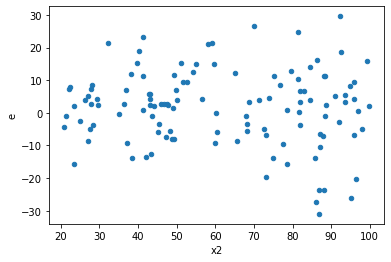

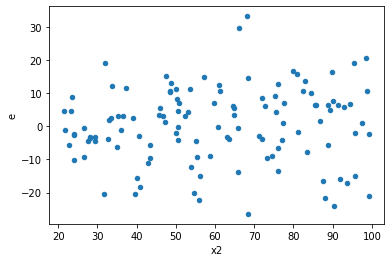

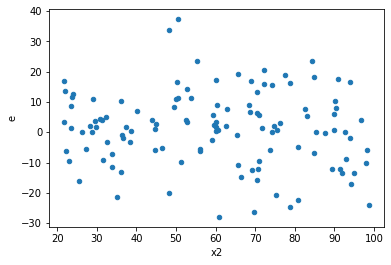

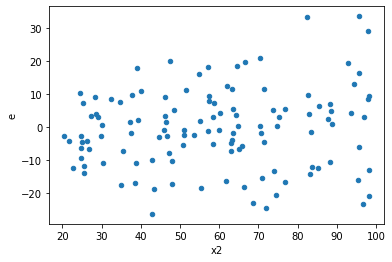

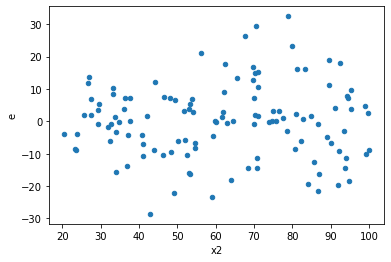

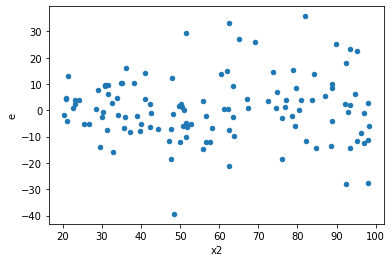

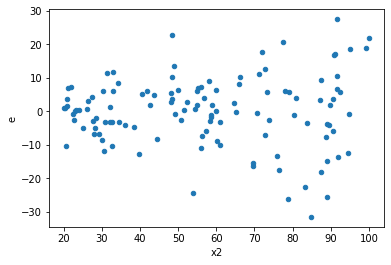

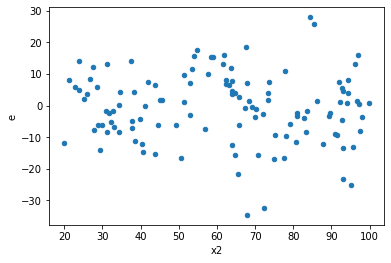

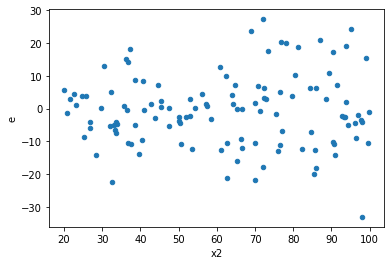

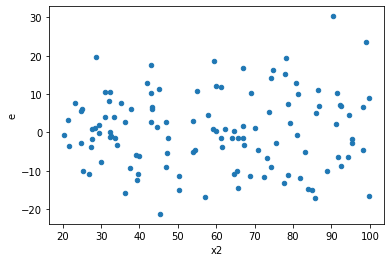

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,44.0,44.0,5300.9995894441145,5478.266195209895,120.47726339645715,124.50604989113398,1.0334402225042183,0.913619607859643,0.5431901960701785,0.4568098039298215,Reject005=1 : Homoscedasticity
1.0,44.0,44.0,3046.9254204922686,6384.827668755826,69.24830501118792,145.1097197444506,2.095498506728884,0.015827336180092466,0.9920863319099538,0.007913668090046233,Reject005=0 : Heteroscedasticity
2.0,44.0,44.0,3523.4506922937217,8394.455086816304,80.07842482485731,190.783070154916,2.3824528338586233,0.004801487101789181,0.9975992564491054,0.0024007435508945907,Reject005=0 : Heteroscedasticity
3.0,44.0,44.0,3765.9216670970454,8020.53125484926,85.58912879766012,182.2848012465741,2.1297658219831943,0.013716678337893695,0.9931416608310532,0.006858339168946848,Reject005=0 : Heteroscedasticity
4.0,44.0,44.0,3689.1178352191005,4751.815369399744,83.84358716407047,107.99580384999418,1.2880627785958287,0.40444562061509304,0.7977771896924535,0.20222281030754652,Reject005=1 : Homoscedasticity
5.0,44.0,44.0,2681.9761681731497,9288.52349283257,60.95400382211704,211.1028066552857,3.463313210258511,7.00885136146745e-05,0.9999649557431927,3.504425680733725e-05,Reject005=0 : Heteroscedasticity
6.0,44.0,44.0,3327.9320089025405,5354.18805128876,75.63481838414864,121.68609207474455,1.6088634133647528,0.11853329658307343,0.9407333517084633,0.05926664829153672,Reject005=1 : Homoscedasticity
7.0,44.0,44.0,4921.106168784372,9960.95474284613,111.84332201782664,226.38533506468477,2.0241292102232205,0.02132777248217721,0.9893361137589114,0.010663886241088605,Reject005=0 : Heteroscedasticity
8.0,44.0,44.0,4396.221157728417,4710.499062646084,99.91411722110038,107.05679687832009,1.071488192618603,0.8198886790147464,0.5900556604926268,0.4099443395073732,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,44.0,44.0,5300.9995894441145,5478.266195209895,120.47726339645715,124.50604989113398,1.0334402225042183,0.913619607859643,Reject005=1 : Homoscedasticity
1.0,44.0,44.0,3046.9254204922686,6384.827668755826,69.24830501118792,145.1097197444506,2.095498506728884,0.015827336180092466,Reject005=0 : Heteroscedasticity
2.0,44.0,44.0,3523.4506922937217,8394.455086816304,80.07842482485731,190.783070154916,2.3824528338586233,0.004801487101789181,Reject005=0 : Heteroscedasticity
3.0,44.0,44.0,3765.9216670970454,8020.53125484926,85.58912879766012,182.2848012465741,2.1297658219831943,0.013716678337893695,Reject005=0 : Heteroscedasticity
4.0,44.0,44.0,3689.1178352191005,4751.815369399744,83.84358716407047,107.99580384999418,1.2880627785958287,0.40444562061509304,Reject005=1 : Homoscedasticity
5.0,44.0,44.0,2681.9761681731497,9288.52349283257,60.95400382211704,211.1028066552857,3.463313210258511,7.00885136146745e-05,Reject005=0 : Heteroscedasticity
6.0,44.0,44.0,3327.9320089025405,5354.18805128876,75.63481838414864,121.68609207474455,1.6088634133647528,0.11853329658307343,Reject005=1 : Homoscedasticity
7.0,44.0,44.0,4921.106168784372,9960.95474284613,111.84332201782664,226.38533506468477,2.0241292102232205,0.02132777248217721,Reject005=0 : Heteroscedasticity
8.0,44.0,44.0,4396.221157728417,4710.499062646084,99.91411722110038,107.05679687832009,1.071488192618603,0.8198886790147464,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      660
Reject005=0 : Heteroscedasticity    340
Name: Result_test, dtype: int64